In [1]:
### Run this cell before continuing.
#library(cowplot)
library(dplyr)
library(gridExtra)
library(tidyverse)
library(repr)
library(infer)
library(repr)
library(datateachr)
library(digest)
library(lubridate)
library(taxyvr)
library(broom)
library(testthat)
    


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0     ✔ purrr   1.0.0
✔ tibble  3.1.8     ✔ stringr 1.5.0
✔ tidyr   1.2.1     ✔ forcats 0.5.2
✔ readr   2.1.3     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ gridExtra::combine() masks dplyr::combine()
✖ dplyr::filter()      masks stats::filter()
✖ dplyr::lag()         masks stats::lag()


ERROR: Error in library(infer): there is no package called ‘infer’


*STAT 201 - GROUP 7*

# Comparing Car Theft in Vancouver, BC. (rough title)

Analysis by Soham Chakote, Lisa Desjarlais, Kiersten Lyde-Stad, Hongli Zhang

# Introduction

### Background

### Question

We ask "concerning 2018 and 2022, is the proportion of thefts from vehicles in the Strathcona and Grandview-Woodland districts significantly higher than in the West End and Central Business districts of Vancouver, BC.?"

# Preliminary Results

##### Read, Clean, & Wrangle

In [20]:
#Read and Combine CSVS (code from https://statisticsglobe.com/merge-csv-files-in-r)
crime <- list.files(path = "data/", 
                       pattern = "*.csv", full.names = TRUE) %>% 
  lapply(read_csv, show_col_types=FALSE) %>%      #Quieted messages                      
  bind_rows      
head(crime)

TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Theft from Vehicle,2018,8,27,15,30,1X E CORDOVA ST,Central Business District,492441.8,5458858
Theft from Vehicle,2018,11,27,17,0,1X W HASTINGS ST,Central Business District,492375.3,5458758
Theft from Vehicle,2018,2,3,23,0,1XX ABBOTT ST,Central Business District,492271.3,5459048
Theft from Vehicle,2018,7,23,14,0,1XX ABBOTT ST,Central Business District,492271.3,5459048
Theft from Vehicle,2018,1,8,23,48,1XX ABBOTT ST,Central Business District,492274.3,5459062
Theft from Vehicle,2018,1,19,23,0,1XX ABBOTT ST,Central Business District,492274.3,5459062


##### Plot(s)

In [83]:
crime2s <- crime |>
    select(TYPE, YEAR, NEIGHBOURHOOD)
crime_theft_prop <- crime2s |>
    group_by(NEIGHBOURHOOD) |>
    summarize(n_all_crime = n(),
              n_thefts = sum(TYPE == "Theft from Vehicle"),
              prop = n_thefts / n_all_crime)
crime_theft_prop
              
crime_theft_ave <- crime2s |>
    filter(TYPE == "Theft from Vehicle") |>
    group_by(NEIGHBOURHOOD) |>
    summarize(n = n(),
              mean_theft = n / 4)
crime_theft_ave


NEIGHBOURHOOD,n_all_crime,n_thefts,prop
<chr>,<int>,<int>,<dbl>
Central Business District,60377,18899,0.3130165
Grandview-Woodland,9583,2451,0.2557654
Strathcona,14576,3304,0.2266740
West End,16932,5341,0.3154382


NEIGHBOURHOOD,n,mean_theft
<chr>,<int>,<dbl>
Central Business District,18899,4724.75
Grandview-Woodland,2451,612.75
Strathcona,3304,826.00
West End,5341,1335.25


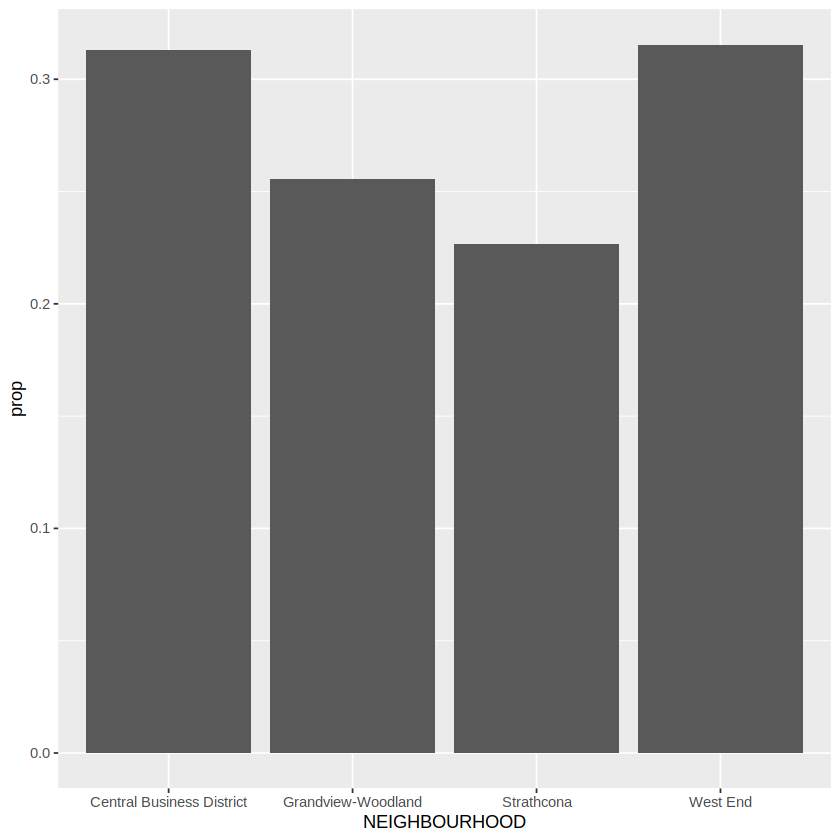

In [98]:
prop_theft_plot <- crime_theft_prop |>
    ggplot(aes(x = NEIGHBOURHOOD, y = prop)) +
    geom_bar(stat = "identity")
prop_theft_plot

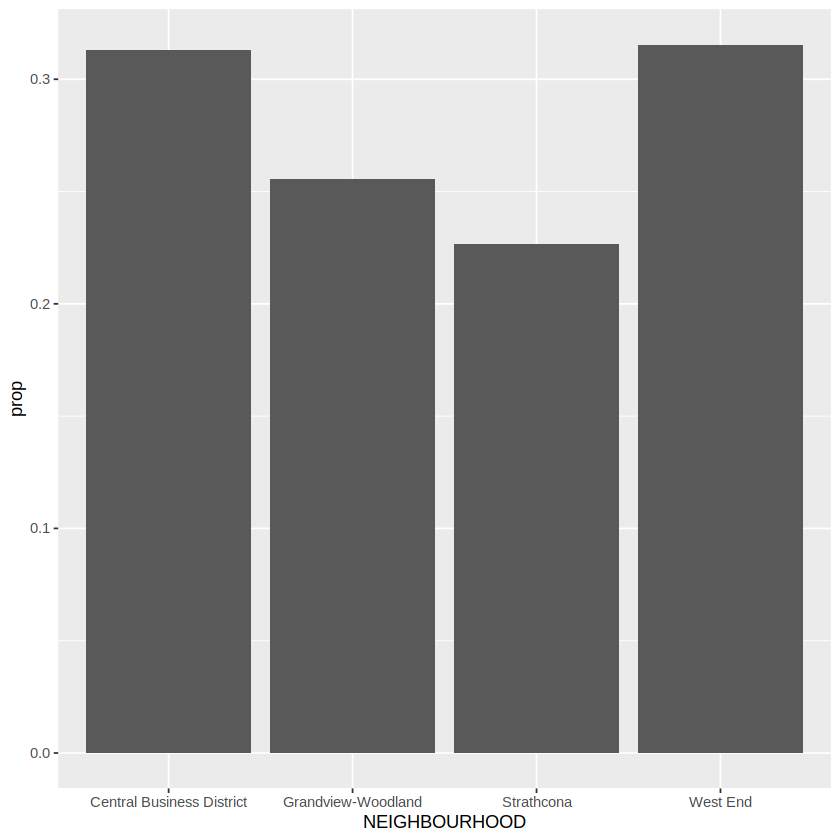

In [99]:
mean_theft_plot <- crime_theft_ave |>
    ggplot(aes(x = NEIGHBOURHOOD, y = mean_theft)) +
    geom_bar(stat = "identity")
prop_theft_plot

In [43]:
# Filter the data for 2018 and 2022 and calculate the mean month
crimes_year_2018 <- crime %>%
  select(YEAR, MONTH) %>%
  filter(YEAR == 2018)
month_2018_mean <- mean(crimes_year_2018$MONTH)

crimes_year_2022 <- crime %>%
  select(YEAR, MONTH) %>%
  filter(YEAR == 2022)

average_month <- crimes_year_2022 %>%
  summarize(avg_month = mean(MONTH))
month_2022_mean <- average_month$avg_month
month_2022_mean


#First  focus on vehicle theft
# Count the number of "Theft from Vehicle" crimes
theft_from_vehicle_count <- crime %>%
 filter(TYPE == "Theft from Vehicle") %>%
 nrow()

# Output the count
cat("Number of 'Theft from Vehicle' crimes:", theft_from_vehicle_count)


theft_from_vehicle <- crime %>%
  filter(TYPE == "Theft from Vehicle" &
         NEIGHBOURHOOD %in% c("Strathcona", "Grandview-Woodland", "Central Business District", "West End")) %>%
  group_by(NEIGHBOURHOOD) %>%
  summarize(count = n())

theft_from_vehicle

theft_from_vehicle_histogram <- theft_from_vehicle %>%
    ggplot(aes(x = NEIGHBOURHOOD)) +
    geom_histogram(bins = 0.5, fill = "blue", alpha = 0.5) +
    labs(x = "Neighbourhood", y = "Number of crimes",
       title = "Histogram of Theft from Vehicle crimes in specified areas")

theft_from_vehicle_histogram



[1] 6.532286

Number of 'Theft from Vehicle' crimes: 29995

NEIGHBOURHOOD,count
<chr>,<int>
Central Business District,18899
Grandview-Woodland,2451
Strathcona,3304
West End,5341


ERROR while rich displaying an object: Error in `geom_histogram()`:
! Problem while computing stat.
ℹ Error occurred in the 1st layer.
Caused by error in `setup_params()`:
! `stat_bin()` requires a continuous x aesthetic
✖ the x aesthetic is discrete.
ℹ Perhaps you want `stat="count"`?

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is

In [31]:
crime_time <- crime %>%
  unite("time", c("HOUR", "MINUTE"), sep = "", remove = FALSE) %>%
  mutate(time_num = as.numeric(time)) %>%
  select(-c(HOUR, MINUTE))


In [34]:
# Filter for year 2022
crimes_year_2022 <- crime_time %>%
  filter(YEAR == 2022)

# Calculate mean of time_num for year 2022
mean_time_num_2022 <- crimes_year_2022 %>%
  summarize(mean_time_num = mean(time_num))

mean_time_num_2022$mean_time_num

[1] 709.6995

##### Table of Estimates

# Methods: Plan

(The previous sections will carry over to your final report (you’ll be allowed to improve them based on feedback you get). Begin this Methods section with a brief description of “the good things” about this report – specifically, in what ways is this report trustworthy?

Continue by explaining why the plot(s) and estimates that you produced are not enough to give to a stakeholder, and what you should provide in addition to address this gap. Make sure your plans include at least one hypothesis test and one confidence interval. If possible, compare both the bootstrapping and asymptotics methods.)



##### What do you expect to find?

 ##### What impact could such findings have?

##### What future questions could this lead to?

# References

At least two citations of literature relevant to the project. The citation format is your choice – just be consistent. Make sure to cite the source of your data as well.

- 1
- 2
